In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [8]:
data = load_wine().data
target = load_wine().target

f_names = load_wine().feature_names
f_targets = load_wine().target_names

df = pd.DataFrame(data, columns=f_names)

In [ ]:
df.describe()

In [9]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [19]:
shape = df.shape
naCount = df.isna().sum().sum()
dupCount = df.duplicated().sum()

print(f'numberof instance: {shape[0]} \nNumber of feature: {shape[1]}')
print(f'Number of nulls: {naCount}\nNumber of duplicate: {dupCount}')

numberof instance: 178 
Number of features: 13
Number of nulls: 0
Number of duplicate: 0


To better grasp the target column (hue)

In [14]:
columns = ['hue', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
           'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
           'proanthocyanins', 'color_intensity', 'od280/od315_of_diluted_wines',
           'proline']
df = df[columns]

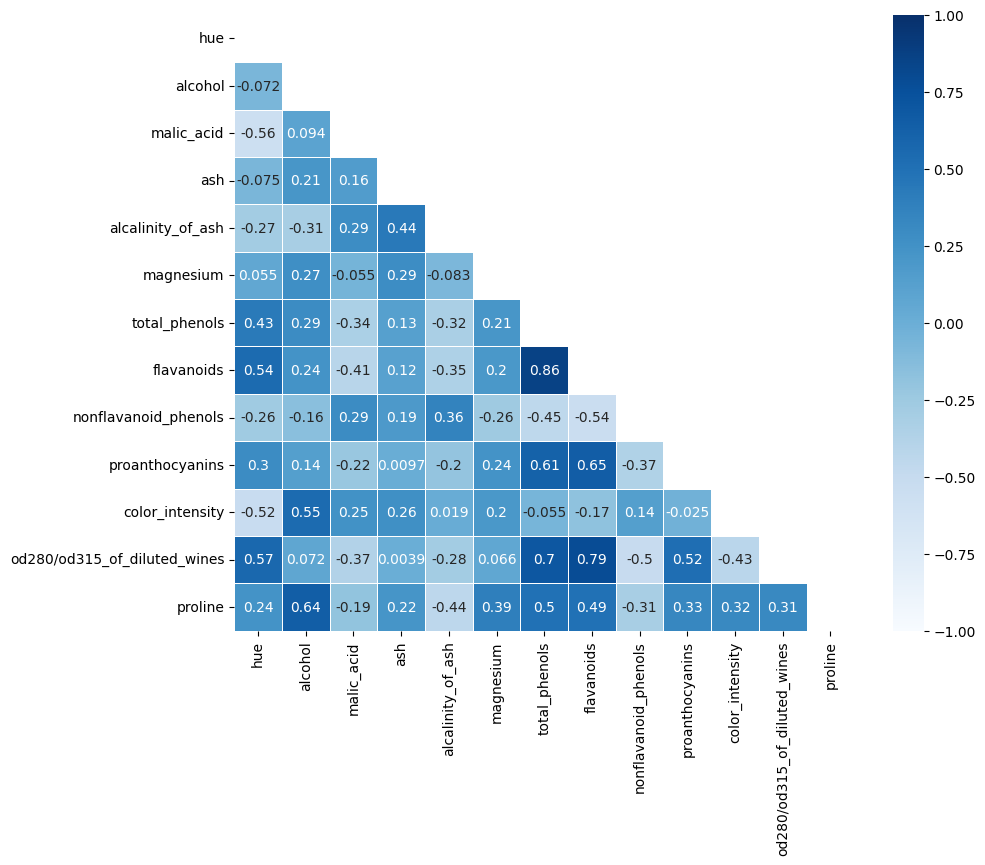

In [15]:
corr = df.corr()
matrix = np.triu(corr)
plt.figure(figsize=(10,8))
sns.heatmap(corr, mask = matrix, annot=True, cmap = 'Blues', linewidths = 0.5,
            vmin = -1, vmax = 1)
plt.show()

In [63]:
y = df['hue']
X = df.drop(['hue'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                shuffle=True, random_state=42,)
print(f'Train instance: {len(X_train)}, Test instance: {len(X_test)}')

Train instance: 142, Test instance: 36


In [64]:
# Scaling 1
mms = MinMaxScaler()
mms.fit(X_train)
X_train_mms = mms.transform(X_train)
X_test_mms = mms.transform(X_test) # to maintain the consistency

# Scaling 2
''' Not suitable for KNN because of the fact that MinMaxScaler
 preserves the relative distances between data points, which is crucial
 for distance-based algorithms like KNN.
 StandardScaler, on the other hand, may distort these distances,
 leading to less accurate predictions. '''
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [65]:
best_r2 = -float(1)
best_n_neighbors = None
r2_scores = []

for i in range(2,20):
    knn_reg = KNeighborsRegressor(n_neighbors=i, metric="minkowski", weights ='distance')
    knn_reg.fit(X_train_mms, y_train)
    y_pred = knn_reg.predict(X_test_mms)
    r2 = r2_score(y_test, y_pred)
    print(f'n_neighbors: {i}, r2: {r2}')
    r2_scores.append((i, r2))
    if r2 > best_r2:
        best_r2 = r2
        best_n_neighbors = i
print(20*'---')

print(f'Best n_neighbors: {best_n_neighbors}, Best R²: {best_r2:.3f}')

n_neighbors: 2, r2: 0.6439076951466749
n_neighbors: 3, r2: 0.6509069168834252
n_neighbors: 4, r2: 0.651476961966639
n_neighbors: 5, r2: 0.7082000178382146
n_neighbors: 6, r2: 0.7254266321439425
n_neighbors: 7, r2: 0.7126087089517139
n_neighbors: 8, r2: 0.6901563746139696
n_neighbors: 9, r2: 0.71420514163935
n_neighbors: 10, r2: 0.7013223643943884
n_neighbors: 11, r2: 0.6901858820898366
n_neighbors: 12, r2: 0.7032618910697257
n_neighbors: 13, r2: 0.6892044662518334
n_neighbors: 14, r2: 0.6812439678597476
n_neighbors: 15, r2: 0.6786317302312925
n_neighbors: 16, r2: 0.6716404560826863
n_neighbors: 17, r2: 0.6740177577540547
n_neighbors: 18, r2: 0.6719724064369224
n_neighbors: 19, r2: 0.6641881021054499
------------------------------------------------------------
Best n_neighbors: 6, Best R²: 0.725


In [27]:
for i in range(2,20):
    knn_reg = KNeighborsRegressor(n_neighbors=i, metric="euclidean",)
    knn_reg.fit(X_train_ss, y_train)
    y_pred = knn_reg.predict(X_test_ss)
    r2 = r2_score(y_test, y_pred)
    print(f'n_neighbors: {i}, r2: {r2}')

n_neighbors: 2, r2: 0.640492331994998
n_neighbors: 3, r2: 0.6044084629617442
n_neighbors: 4, r2: 0.5484968406502997
n_neighbors: 5, r2: 0.667620614756796
n_neighbors: 6, r2: 0.6763970249456985
n_neighbors: 7, r2: 0.6457802666910244
n_neighbors: 8, r2: 0.6411563302178637
n_neighbors: 9, r2: 0.6278645542578495
n_neighbors: 10, r2: 0.6310928980451525
n_neighbors: 11, r2: 0.6178544817018279
n_neighbors: 12, r2: 0.6251918098247
n_neighbors: 13, r2: 0.630367784603389
n_neighbors: 14, r2: 0.6415091939494154
n_neighbors: 15, r2: 0.6331780044903723
n_neighbors: 16, r2: 0.627429757947739
n_neighbors: 17, r2: 0.6312087632781167
n_neighbors: 18, r2: 0.6389750152970057
n_neighbors: 19, r2: 0.6404275624089167


In [71]:
# Train and predict the model with mms scale
knn_reg = KNeighborsRegressor(n_neighbors=6, metric="minkowski", weights ='distance')
knn_reg.fit(X_train_mms, y_train)

y_pred = knn_reg.predict(X_test_mms)
dif = y_test - y_pred
compare = pd.DataFrame({'Real': y_test, 'Prediction': y_pred, 'Difference': dif})

In [72]:
compare.head(10)

,Real,Prediction,Difference
19,0.96,0.979831,-0.019831
45,0.87,1.012648,-0.142648
140,0.77,0.859934,-0.089934
30,1.19,1.071387,0.118613
67,1.12,1.121137,-0.001137
16,1.07,1.095292,-0.025292
119,0.93,0.977562,-0.047562
174,0.70,0.694287,0.005713
109,0.96,0.860334,0.099666
141,0.70,0.758909,-0.058909
